In [1]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("yellow_tripdata_sample.csv")
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,1.703518,1.581910,2.890472,1.138693,165.323618,163.204020,1.228141,18.278593,1.741457,0.491960,3.483146,0.197357,0.988945,26.847538,2.326633,0.052764
std,0.456936,0.911625,3.125268,3.126260,67.808656,73.059288,0.486448,14.916422,1.255742,0.077276,4.195507,1.180907,0.144929,18.092018,0.673846,0.309523
min,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.000000,-47.800000,-1.000000,-0.500000,0.000000,0.000000,-1.000000,-52.800000,-2.500000,-1.750000
25%,1.000000,1.000000,1.125000,1.000000,114.000000,107.000000,1.000000,9.300000,1.000000,0.500000,0.000000,0.000000,1.000000,16.320000,2.500000,0.000000
50%,2.000000,1.000000,1.960000,1.000000,161.000000,162.000000,1.000000,14.200000,1.000000,0.500000,3.000000,0.000000,1.000000,22.200000,2.500000,0.000000
75%,2.000000,2.000000,3.400000,1.000000,236.000000,236.000000,1.000000,22.600000,3.500000,0.500000,4.820000,0.000000,1.000000,31.770000,2.500000,0.000000
max,2.000000,6.000000,23.900000,99.000000,265.000000,265.000000,4.000000,180.000000,7.750000,0.500000,80.000000,12.750000,1.000000,217.200000,2.500000,1.750000


In [3]:
cols_to_analyze = ["passenger_count", "trip_distance", "fare_amount", "total_amount", "tip_amount", "extra"]

In [ ]:
results = {}

for col in cols_to_analyze:
    series = df[col].dropna()  # drop NaN for calculations
    
    results[col] = {
        "Mean": series.mean(),
        "Median": series.median(),
        "Mode": series.mode().iloc[0] if not series.mode().empty else np.nan,
        "Min": series.min(),
        "Max": series.max(),
        "Std Dev": series.std(),
        "Variance": series.var(),
        "Skewness": series.skew(),
        "Kurtosis": series.kurtosis(),
        "Count": series.count(),
        "Missing Values": df[col].isnull().sum()
    }


results_df = pd.DataFrame(results).T

In [14]:
results_df.to_csv("descriptive_statistics.csv")

In [5]:
print("=== Univariate Analysis Results ===")
print(results_df)

=== Univariate Analysis Results ===
                      Mean  Median   Mode   Min     Max    Std Dev  \
passenger_count   1.581910    1.00   1.00   0.0    6.00   0.911625   
trip_distance     2.890472    1.96   0.90   0.0   23.90   3.125268   
fare_amount      18.278593   14.20   6.50 -47.8  180.00  14.916422   
total_amount     26.847538   22.20  16.32 -52.8  217.20  18.092018   
tip_amount        3.483146    3.00   0.00   0.0   80.00   4.195507   
extra             1.741457    1.00   1.00  -1.0    7.75   1.255742   

                   Variance  Skewness    Kurtosis  Count  Missing Values  
passenger_count    0.831061  1.664330    2.827890  995.0             0.0  
trip_distance      9.767299  3.288172   13.975566  995.0             0.0  
fare_amount      222.499652  3.012440   20.739873  995.0             0.0  
total_amount     327.321108  3.025344   20.194071  995.0             0.0  
tip_amount        17.602279  7.328237  115.485646  995.0             0.0  
extra              1.57

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set(style="whitegrid")



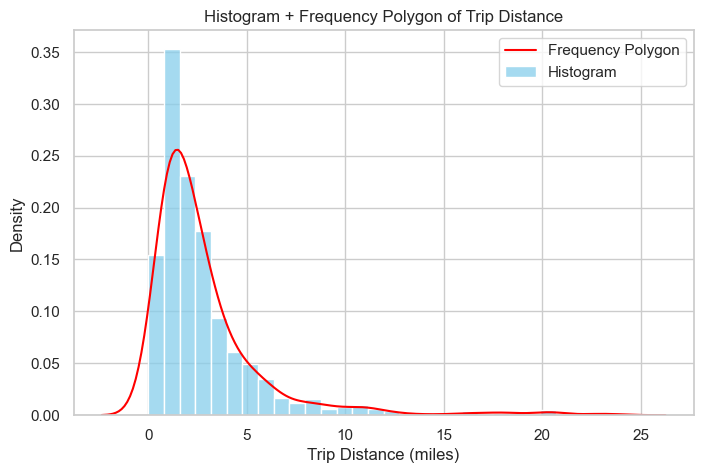

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["trip_distance"], bins=30, color="skyblue", kde=False, stat="density", label="Histogram")
sns.kdeplot(df["trip_distance"], color="red", label="Frequency Polygon")
plt.title("Histogram + Frequency Polygon of Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Density")
plt.legend()
plt.show()

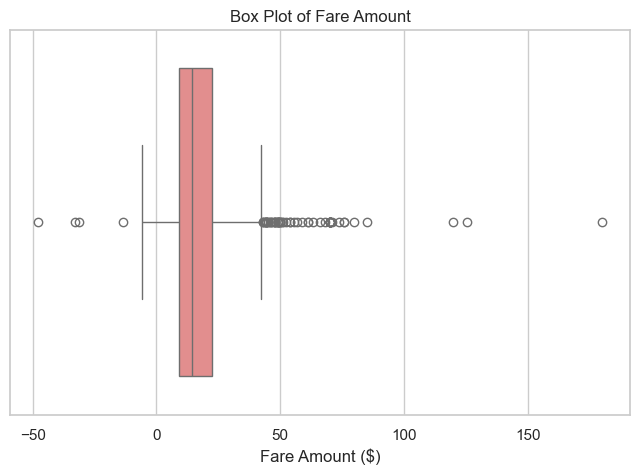

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["fare_amount"], color="lightcoral")
plt.title("Box Plot of Fare Amount")
plt.xlabel("Fare Amount ($)")
plt.show()

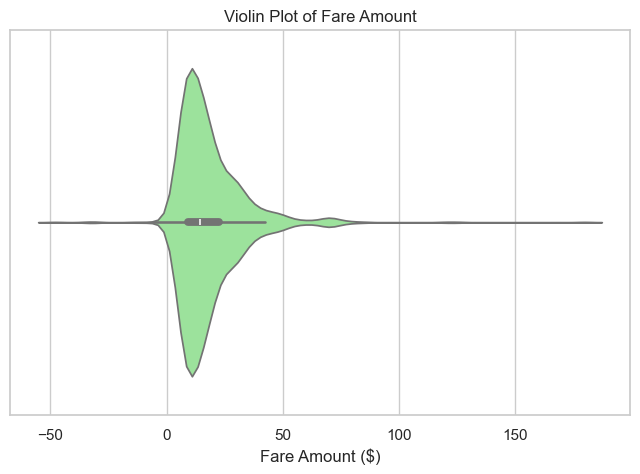

In [10]:
plt.figure(figsize=(8,5))
sns.violinplot(x=df["fare_amount"], color="lightgreen")
plt.title("Violin Plot of Fare Amount")
plt.xlabel("Fare Amount ($)")
plt.show()

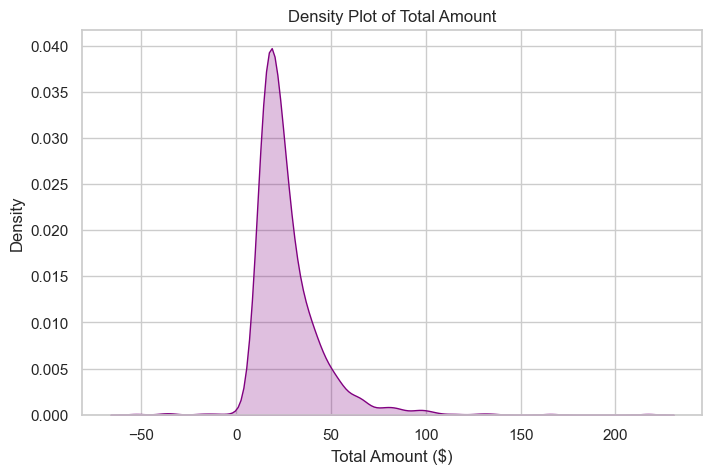

In [11]:
plt.figure(figsize=(8,5))
sns.kdeplot(df["total_amount"], fill=True, color="purple")
plt.title("Density Plot of Total Amount")
plt.xlabel("Total Amount ($)")
plt.ylabel("Density")
plt.show()

C:\Users\sahil\AppData\Local\Temp\ipykernel_4856\1513728068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="payment_type", data=df, palette="muted")


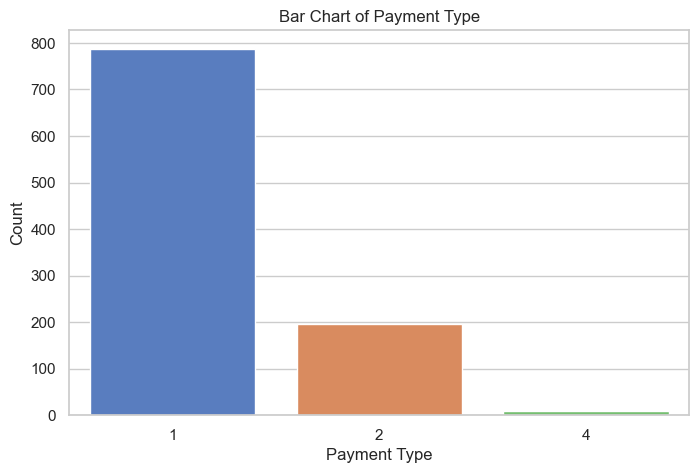

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x="payment_type", data=df, palette="muted")
plt.title("Bar Chart of Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()

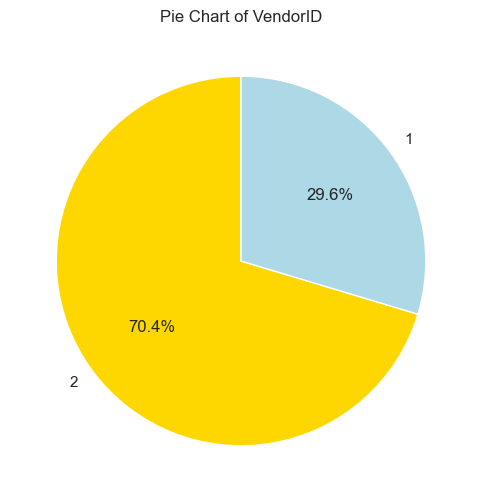

In [ ]:
plt.figure(figsize=(6,6))
df["VendorID"].value_counts().plot.pie(autopct='%1.1f%%', colors=["gold", "lightblue"], startangle=90)
plt.title("Pie Chart of VendorID")
plt.ylabel("")  
plt.show()

In [15]:
num_cols = ["passenger_count", "trip_distance", "fare_amount", "total_amount", "tip_amount", "extra"]


cat_cols = [col for col in ["payment_type", "RatecodeID", "VendorID", "store_and_fwd_flag"] if col in df.columns]


In [16]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

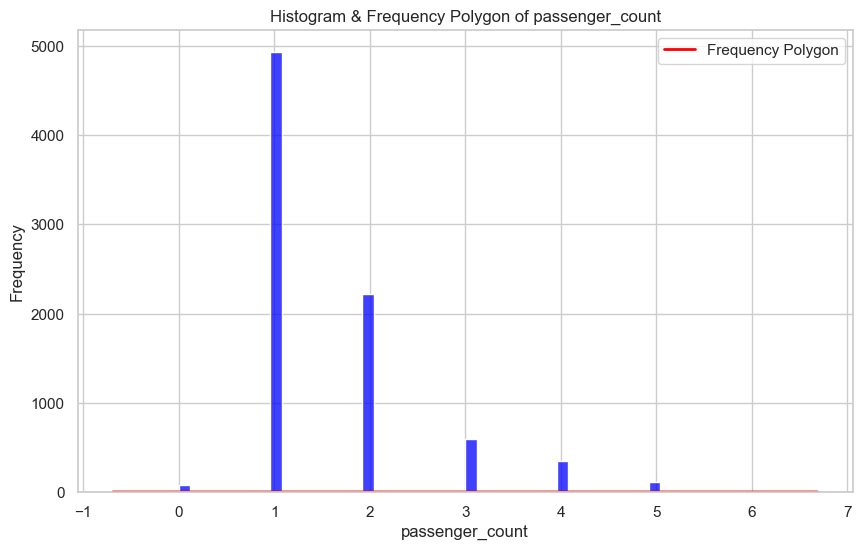

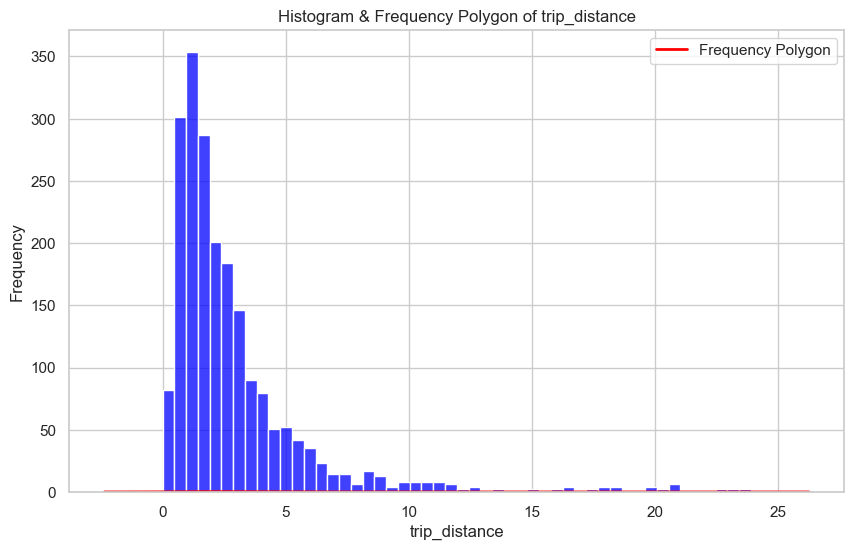

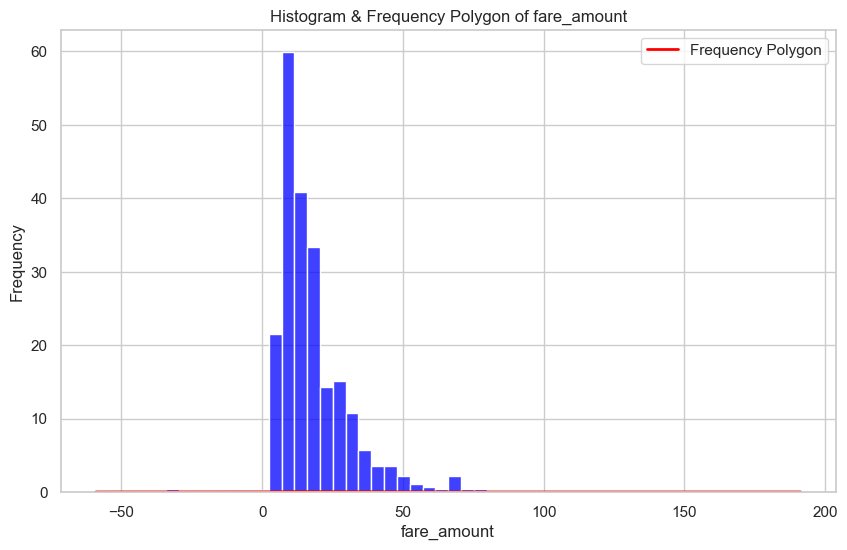

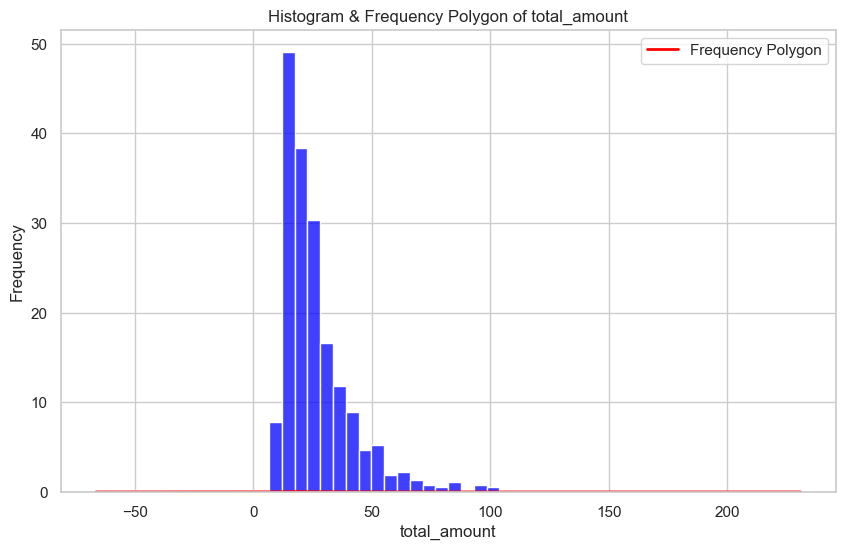

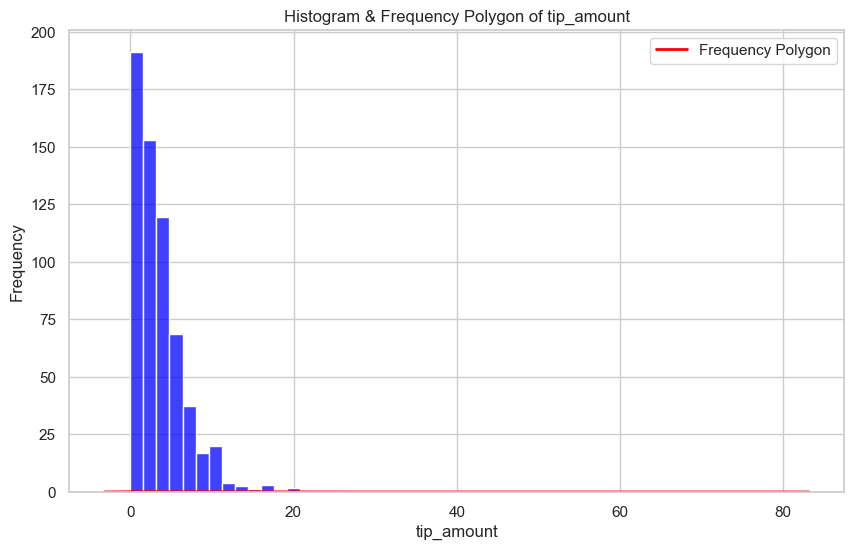

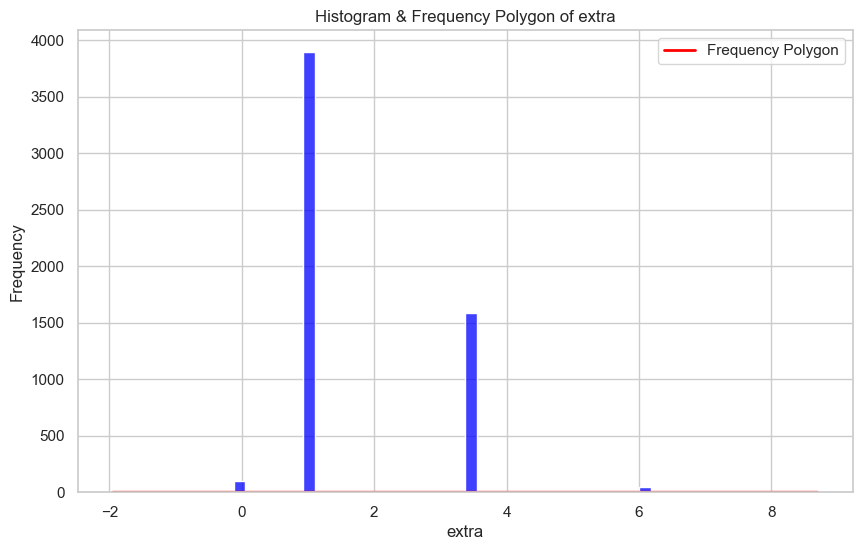

In [17]:
for col in num_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), bins=50, kde=False, color="blue", stat="frequency")
    # Frequency polygon using lineplot on the same data
    sns.kdeplot(df[col].dropna(), color="red", lw=2, label="Frequency Polygon")
    plt.title(f"Histogram & Frequency Polygon of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


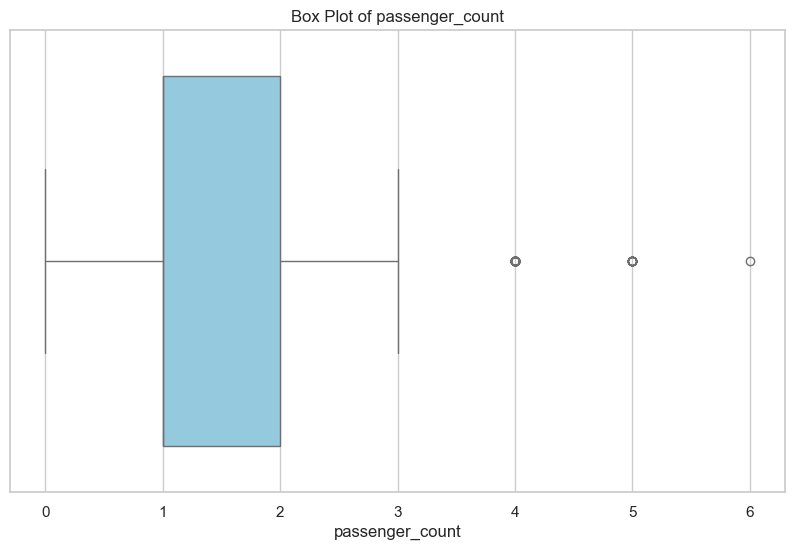

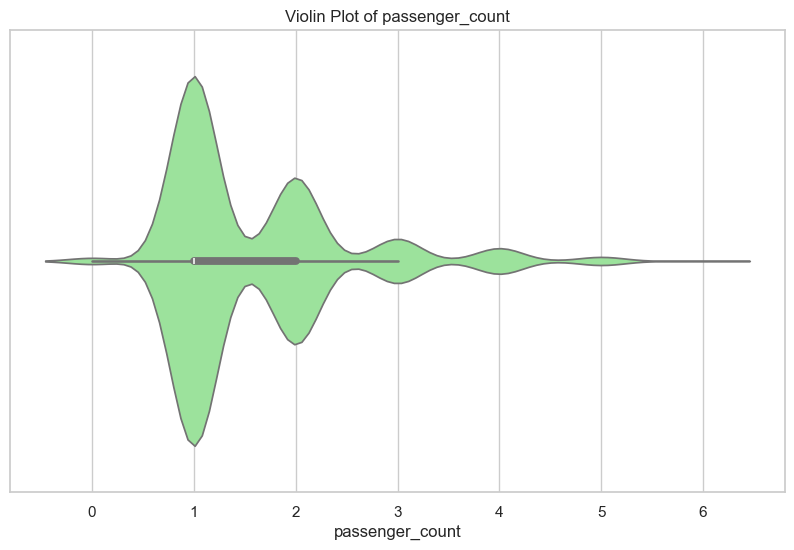

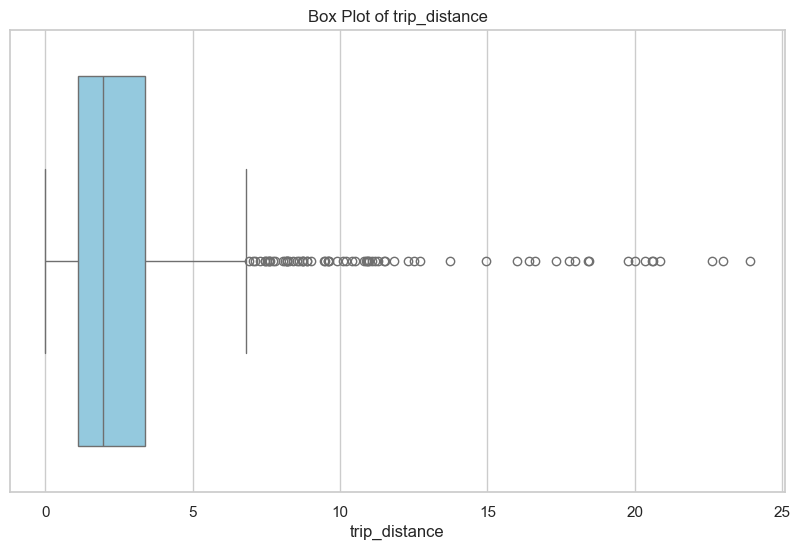

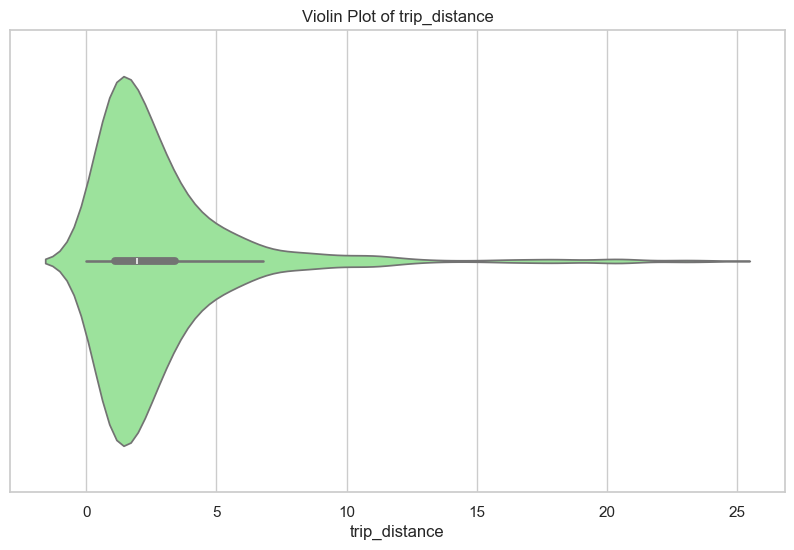

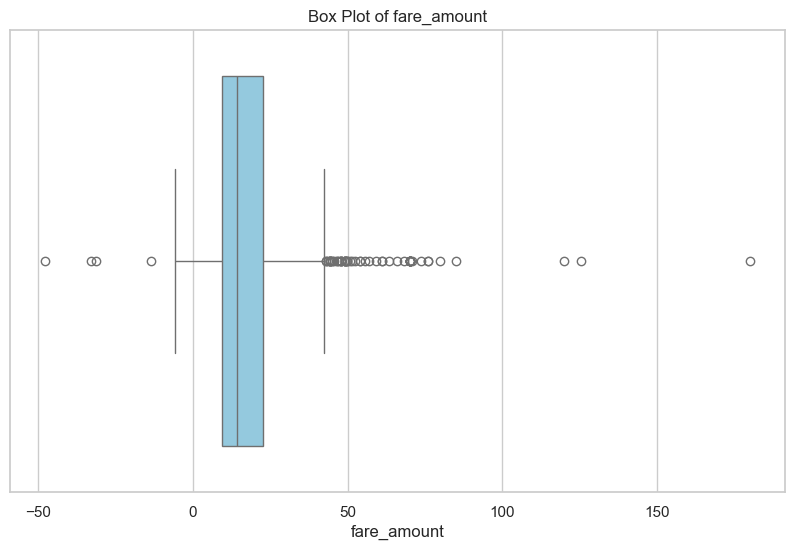

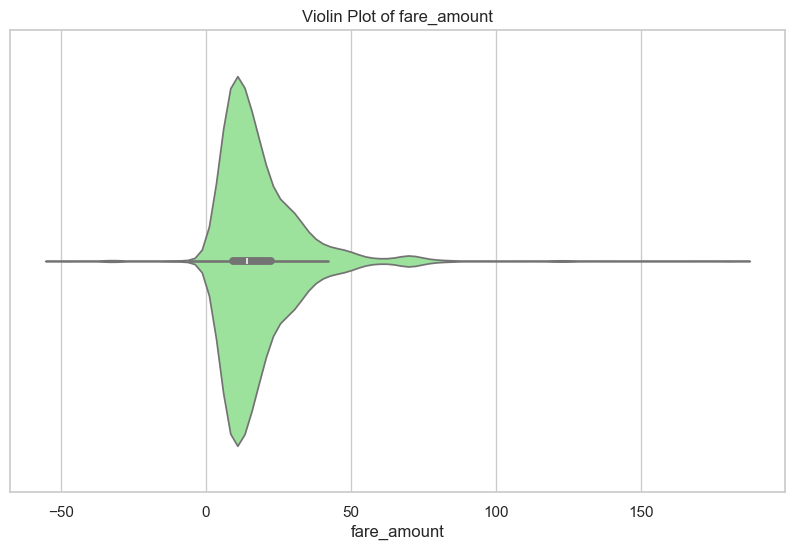

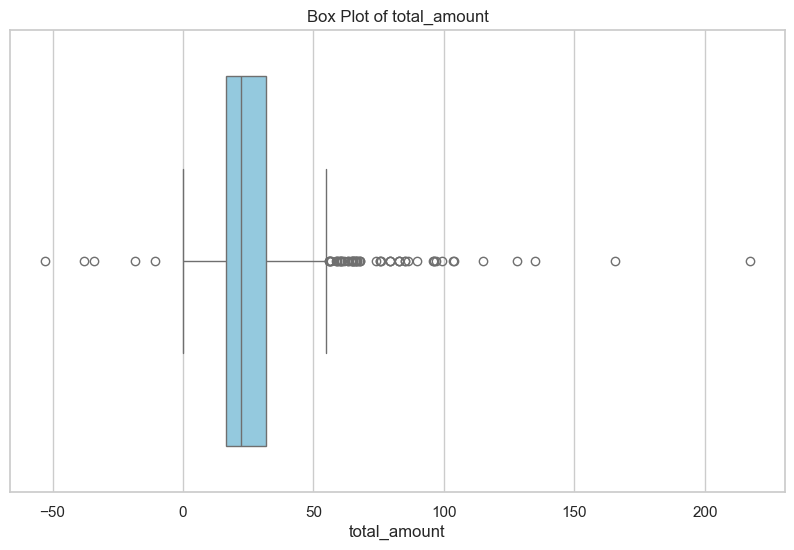

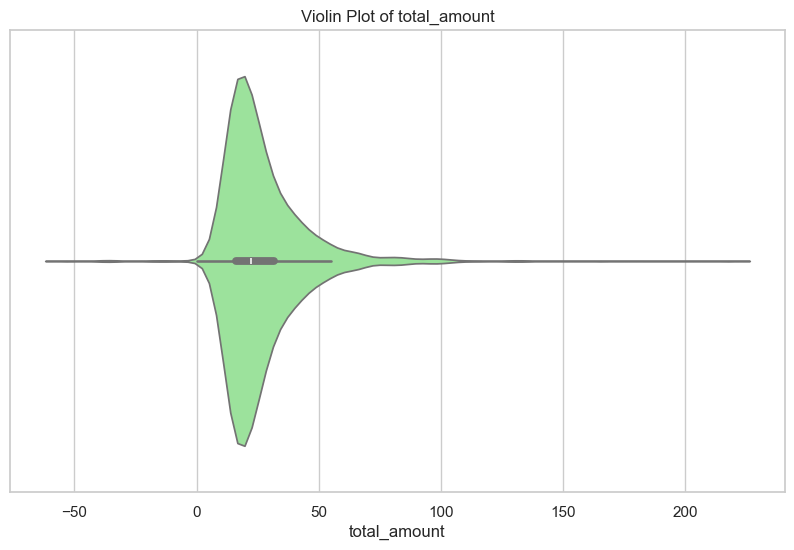

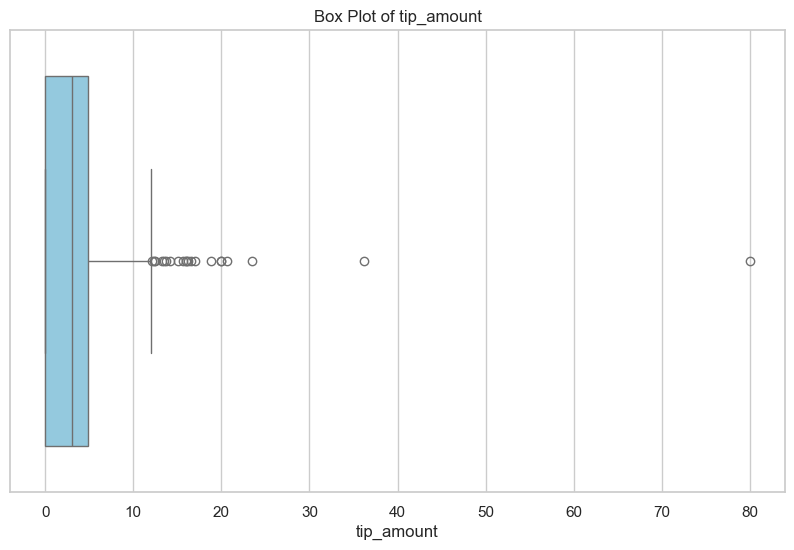

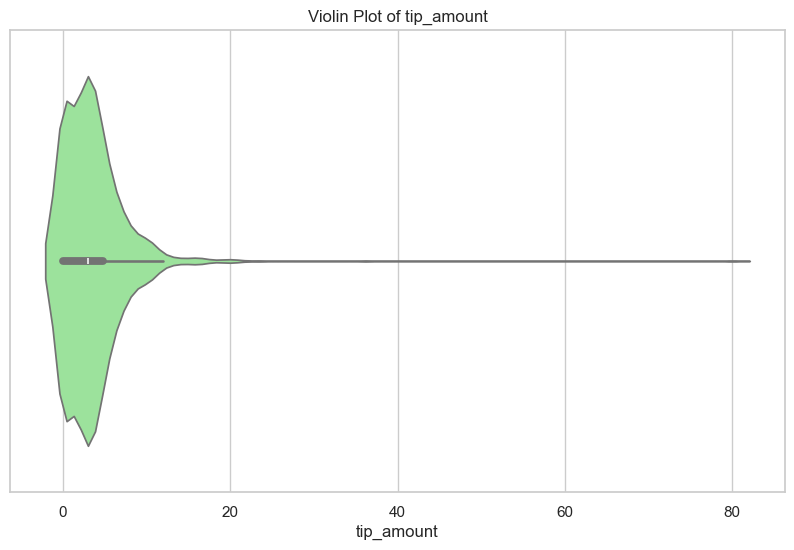

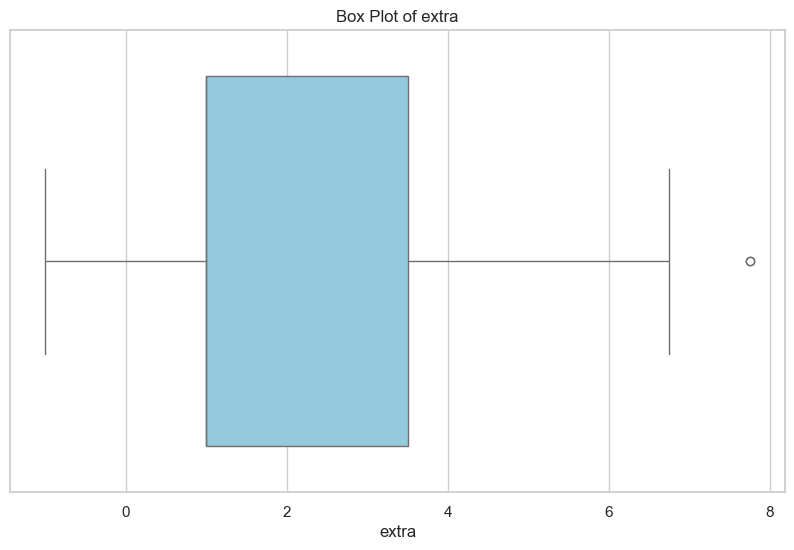

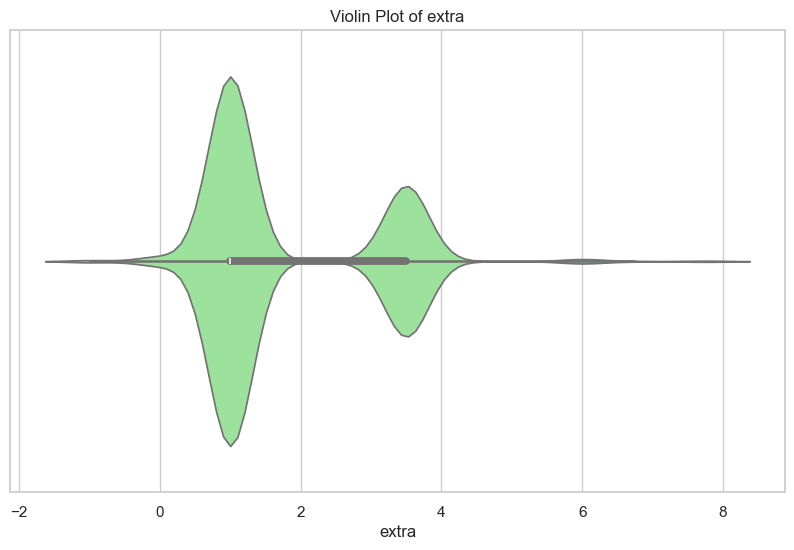

In [18]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Box Plot of {col}")
    plt.show()

    plt.figure()
    sns.violinplot(x=df[col], color="lightgreen")
    plt.title(f"Violin Plot of {col}")
    plt.show()

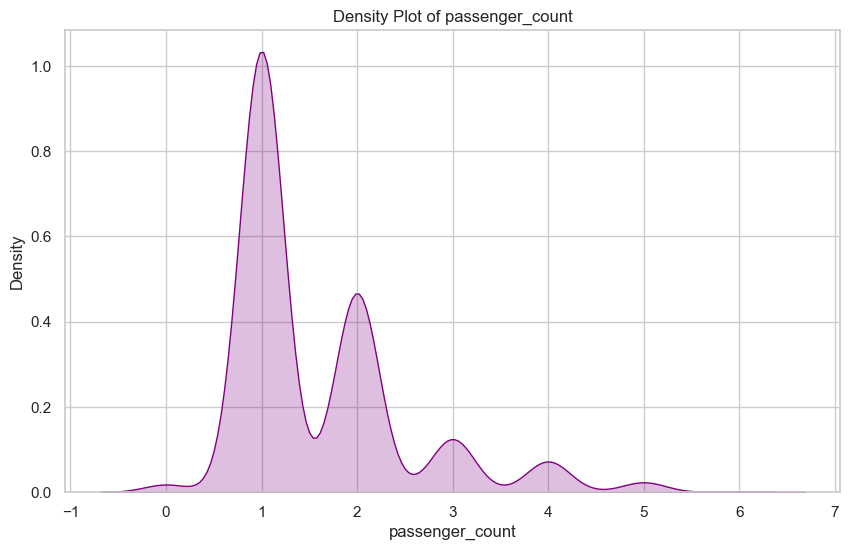

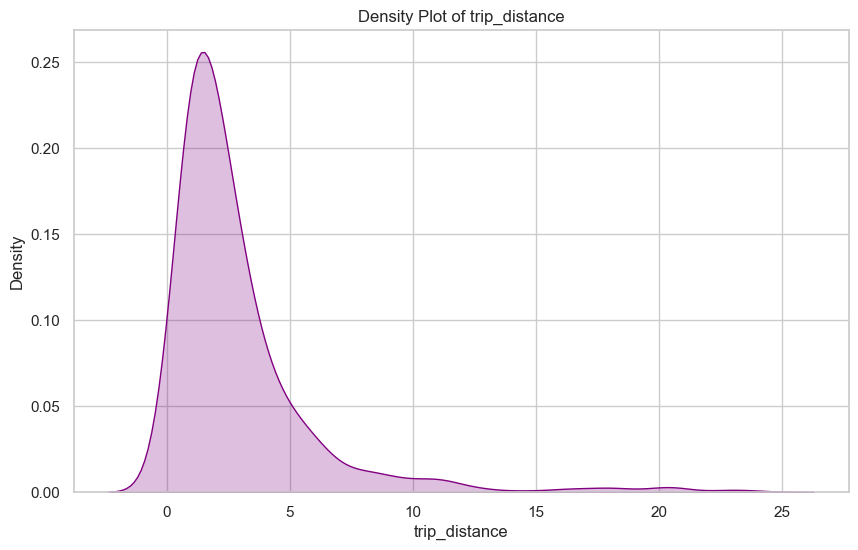

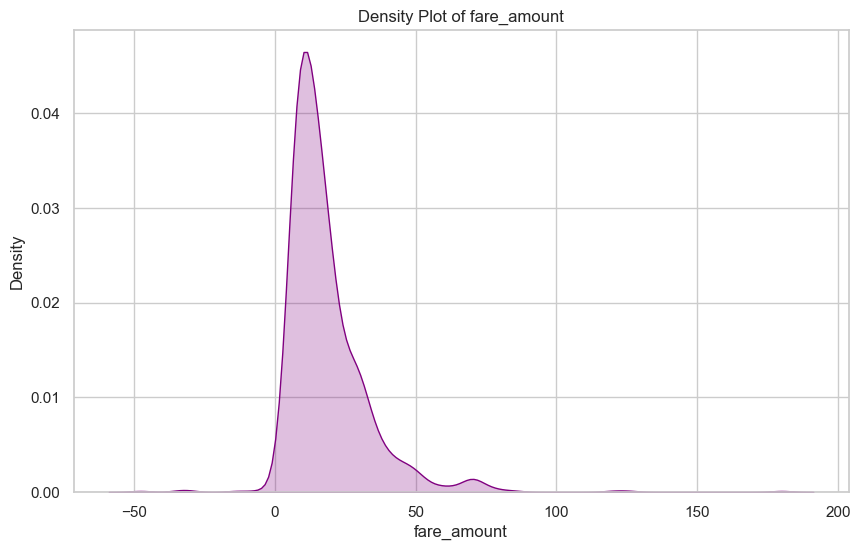

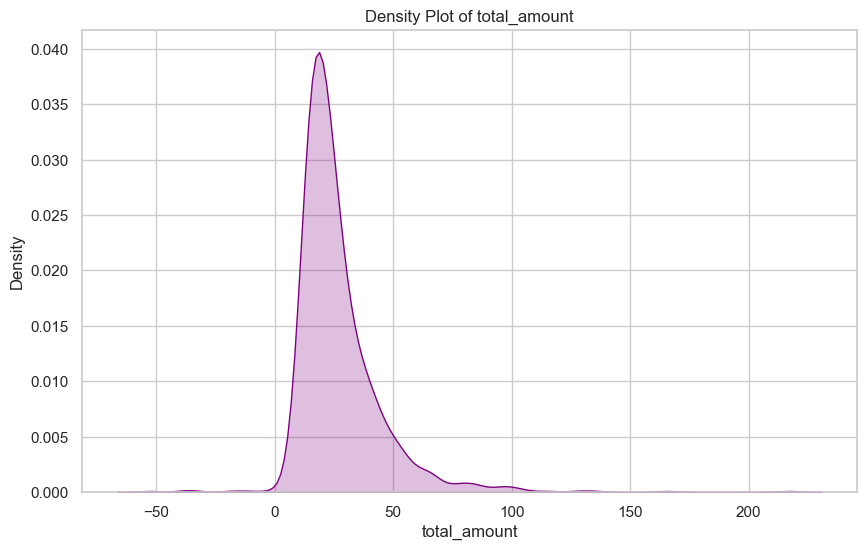

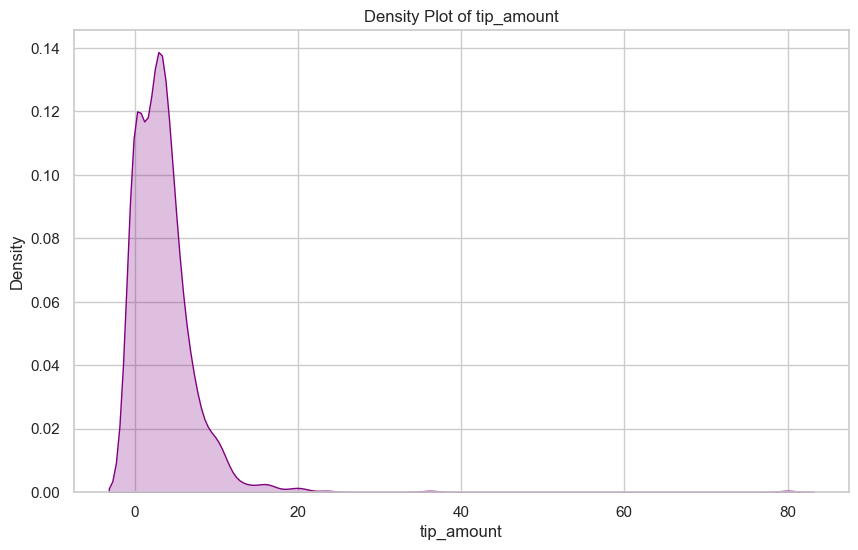

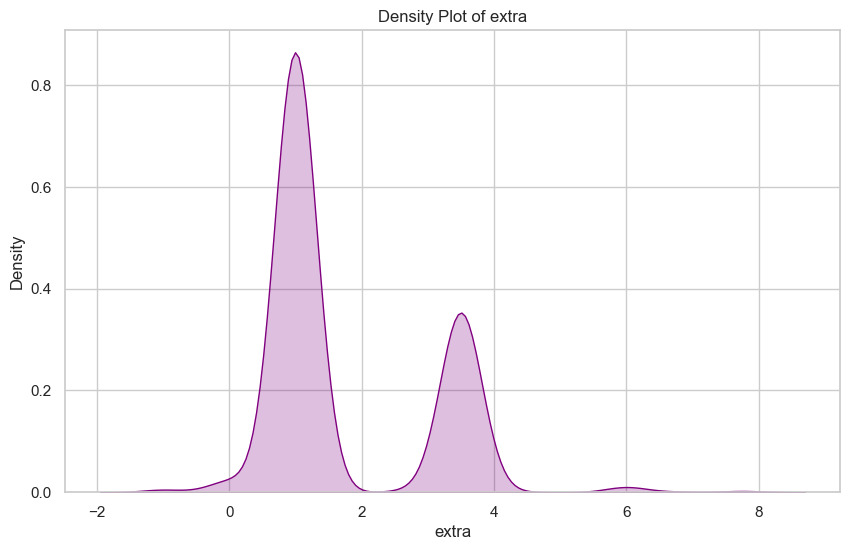

In [19]:
for col in num_cols:
    plt.figure()
    sns.kdeplot(df[col].dropna(), fill=True, color="purple")
    plt.title(f"Density Plot of {col}")
    plt.xlabel(col)
    plt.show()

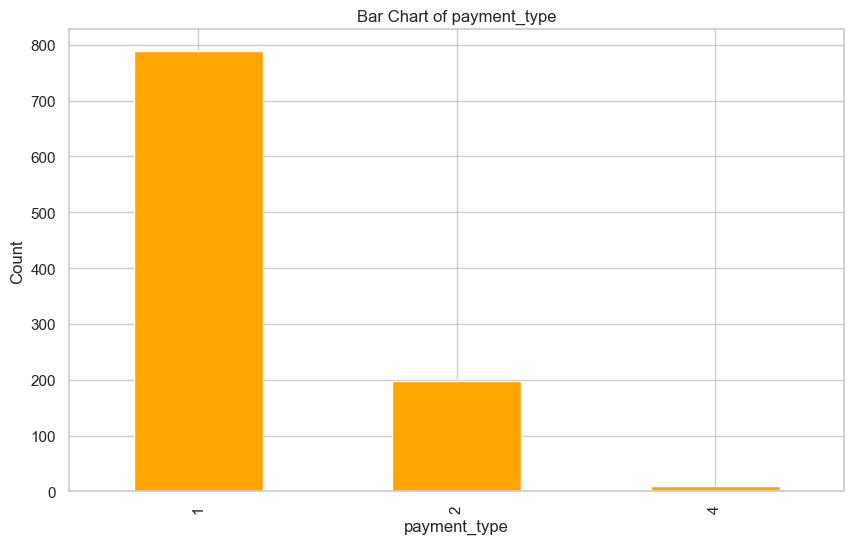

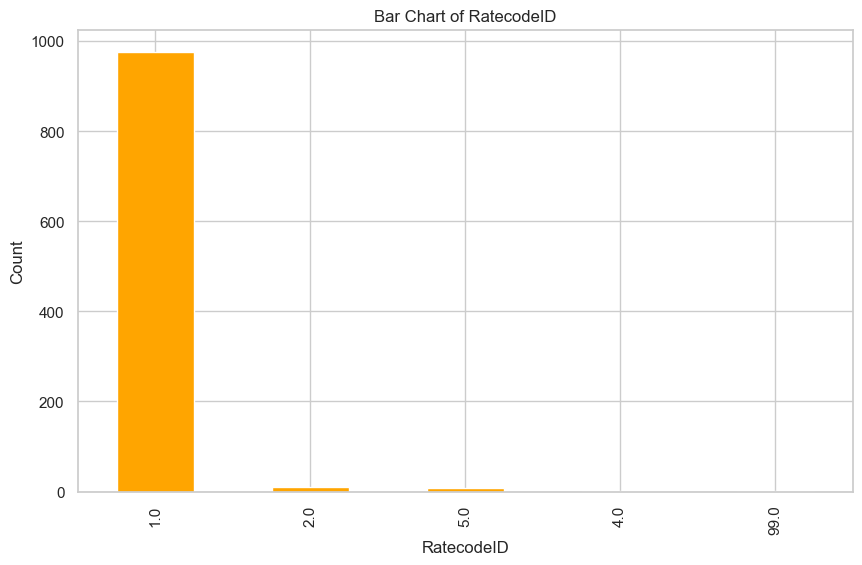

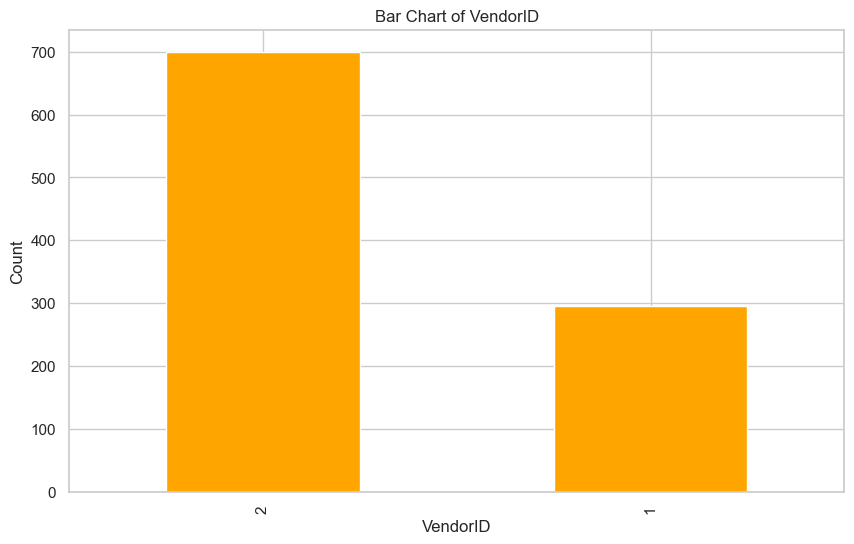

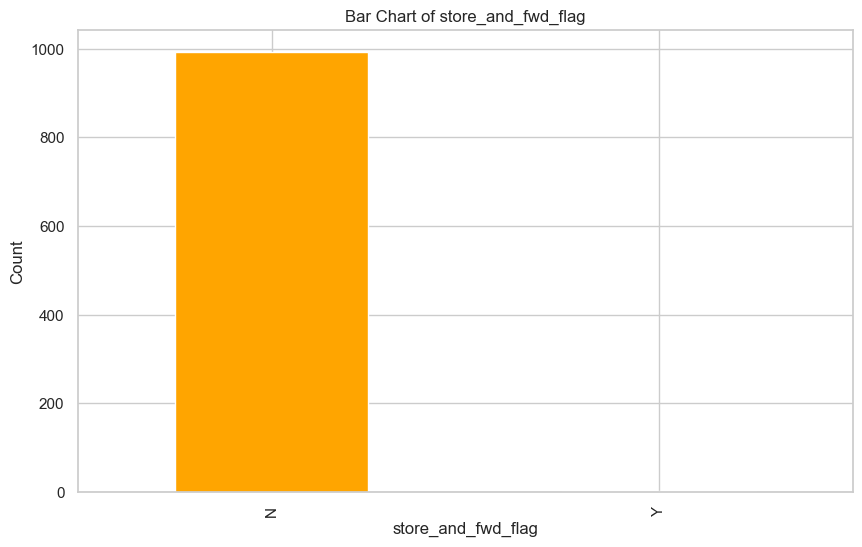

In [20]:
for col in cat_cols:
    plt.figure()
    df[col].value_counts().plot(kind="bar", color="orange")
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

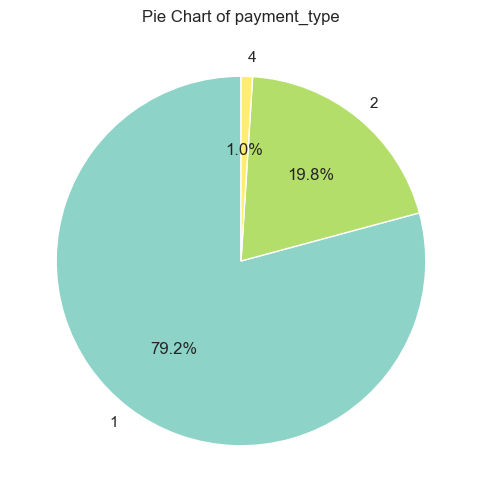

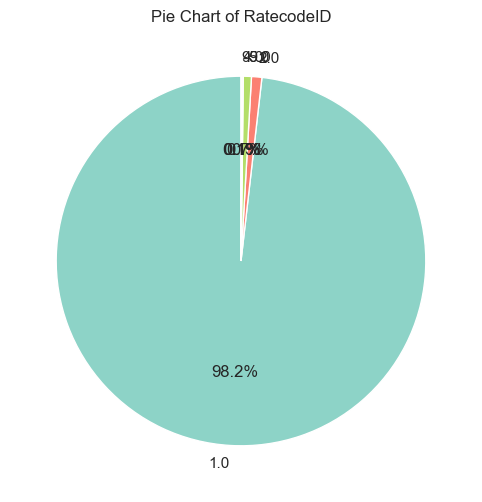

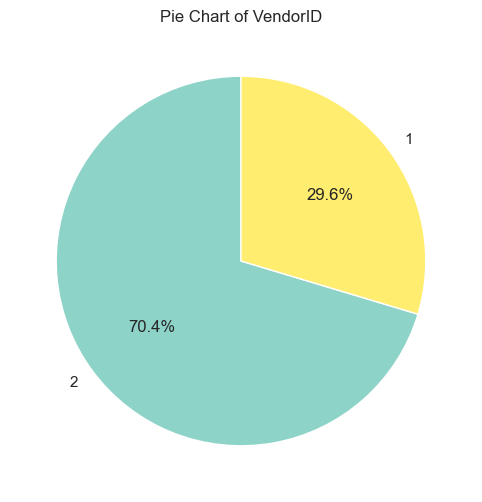

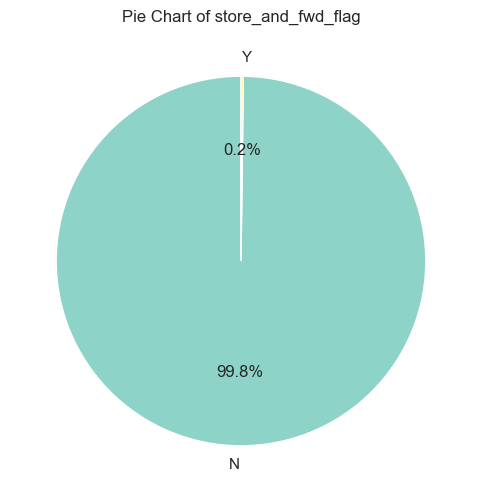

In [21]:
for col in cat_cols:
    plt.figure()
    df[col].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, cmap="Set3")
    plt.title(f"Pie Chart of {col}")
    plt.ylabel("")
    plt.show()

In [23]:
from scipy import stats

In [ ]:
confidence_level = 0.95
alpha = 1 - confidence_level
cols = ["trip_distance", "fare_amount", "tip_amount"]
ci_results = {}

for col in cols:
    data = df[col].dropna()
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1) 
    se = std / np.sqrt(n)      
    

    t_critical = stats.t.ppf(1 - alpha/2, df=n-1)
    
    
    margin_of_error = t_critical * se
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    
    ci_results[col] = {
        "Mean": mean,
        "Sample Size": n,
        "Std Dev": std,
        "Std Error": se,
        "t Critical": t_critical,
        "95% CI Lower": ci_lower,
        "95% CI Upper": ci_upper
    }

ci_df = pd.DataFrame(ci_results).T

print("\n=== 95% Confidence Intervals for Means ===\n")
print(ci_df)


ci_df.to_csv("confidence_intervals.csv")


=== 95% Confidence Intervals for Means ===

                    Mean  Sample Size    Std Dev  Std Error  t Critical  \
trip_distance   2.890472        995.0   3.125268   0.099078    1.962353   
fare_amount    18.278593        995.0  14.916422   0.472882    1.962353   
tip_amount      3.483146        995.0   4.195507   0.133007    1.962353   

               95% CI Lower  95% CI Upper  
trip_distance      2.696047      3.084898  
fare_amount       17.350631     19.206555  
tip_amount         3.222140      3.744152  


For trip_distance:
Mean = 2.89

95% CI = [2.696, 3.084]
Meaning: We are 95% confident that the true population mean of trip_distance lies between 2.696 and 3.084 miles.

For fare_amount:

Mean = 18.28

CI = [17.35, 19.20]
So, the actual average fare is likely between $17.35 and $19.20.

For tip_amount:

Mean = 3.48

CI = [3.22, 3.74]
So, the average tip is likely between $3.22 and $3.74

In [25]:
tip_data = df["tip_amount"].dropna()


mu_0 = 2

t_stat, p_value = stats.ttest_1samp(tip_data, mu_0)

print("\n=== One-Sample t-test: Tip Amount ===")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0: The average tip amount is significantly different from $2.")
else:
    print("Fail to reject H0: No significant difference from $2.")


=== One-Sample t-test: Tip Amount ===
t-statistic: 11.1509, p-value: 0.0000
Reject H0: The average tip amount is significantly different from $2.


In [26]:
if "payment_type" in df.columns:
    credit_fare = df[df["payment_type"] == 1]["fare_amount"].dropna()
    cash_fare = df[df["payment_type"] == 2]["fare_amount"].dropna()

    t_stat2, p_value2 = stats.ttest_ind(credit_fare, cash_fare, equal_var=False)  # Welch's t-test

    print("\n=== Two-Sample t-test: Fare Amount (Credit vs Cash) ===")
    print(f"t-statistic: {t_stat2:.4f}, p-value: {p_value2:.4f}")

    if p_value2 < 0.05:
        print("Reject H0: There is a significant difference in fare amount between Credit Card and Cash.")
    else:
        print("Fail to reject H0: No significant difference in fare amount between the two groups.")
else:
    print("payment_type column not found in dataset.")


=== Two-Sample t-test: Fare Amount (Credit vs Cash) ===
t-statistic: 0.2472, p-value: 0.8049
Fail to reject H0: No significant difference in fare amount between the two groups.


In [27]:
if "payment_type" in df.columns and "RatecodeID" in df.columns:
    contingency_table = pd.crosstab(df["payment_type"], df["RatecodeID"])
    
    chi2_stat, p_value3, dof, expected = stats.chi2_contingency(contingency_table)

    print("\n=== Chi-Square Test: Payment_type vs RateCodeID ===")
    print(f"Chi-square statistic: {chi2_stat:.4f}, p-value: {p_value3:.4f}, Degrees of freedom: {dof}")
    print("\nExpected Frequencies:\n", expected)

    if p_value3 < 0.05:
        print("Reject H0: Payment_type and RateCodeID are NOT independent.")
    else:
        print("Fail to reject H0: Payment_type and RateCodeID are independent.")
else:
    print("Required columns not found in dataset.")


=== Chi-Square Test: Payment_type vs RateCodeID ===
Chi-square statistic: 6.8535, p-value: 0.5525, Degrees of freedom: 8

Expected Frequencies:
 [[7.73744724e+02 7.12763819e+00 7.91959799e-01 5.54371859e+00
  7.91959799e-01]
 [1.93436181e+02 1.78190955e+00 1.97989950e-01 1.38592965e+00
  1.97989950e-01]
 [9.81909548e+00 9.04522613e-02 1.00502513e-02 7.03517588e-02
  1.00502513e-02]]
Fail to reject H0: Payment_type and RateCodeID are independent.


In [29]:
from scipy.stats import pearsonr, spearmanr


=== Pearson Correlation ===
trip_distance vs fare_amount: 0.8017 (p-value: 4.0407e-224)
fare_amount vs tip_amount: 0.4931 (p-value: 4.4616e-62)

=== Spearman Correlation ===
trip_distance vs fare_amount: 0.8731 (p-value: 4.2345e-312)
fare_amount vs tip_amount: 0.4165 (p-value: 5.0935e-43)

=== Correlation Matrix (Pearson) ===
                       VendorID  passenger_count  trip_distance  RatecodeID  \
VendorID               1.000000         0.025753       0.053886   -0.046541   
passenger_count        0.025753         1.000000      -0.062541   -0.021287   
trip_distance          0.053886        -0.062541       1.000000   -0.005816   
RatecodeID            -0.046541        -0.021287      -0.005816    1.000000   
PULocationID          -0.070183        -0.017111      -0.061013    0.024442   
DOLocationID          -0.044987         0.022867      -0.053662   -0.005132   
payment_type          -0.030318        -0.016092       0.003383   -0.009581   
fare_amount            0.056367        

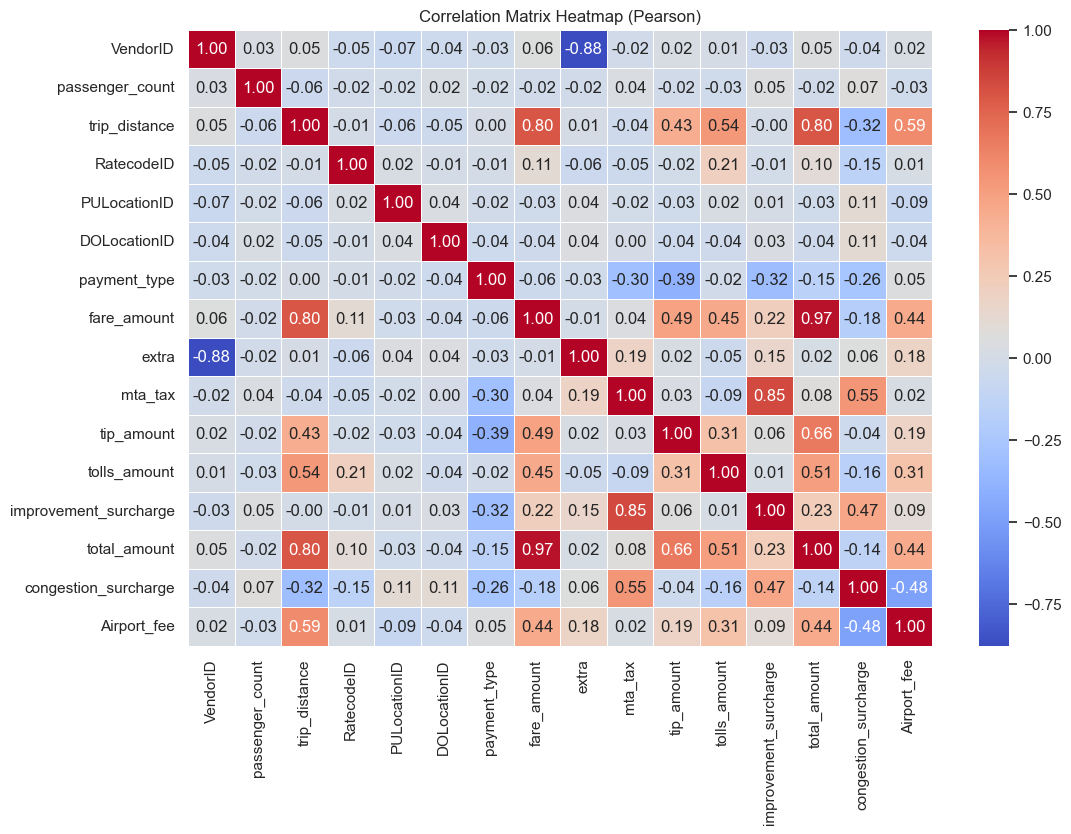

In [30]:
col1 = "trip_distance"
col2 = "fare_amount"
col3 = "tip_amount"

# Drop NaN for relevant columns
data1 = df[[col1, col2, col3]].dropna()

# 1. Pearson Correlation
pearson_1, pval1 = pearsonr(data1[col1], data1[col2])
pearson_2, pval2 = pearsonr(data1[col2], data1[col3])

print("\n=== Pearson Correlation ===")
print(f"{col1} vs {col2}: {pearson_1:.4f} (p-value: {pval1:.4e})")
print(f"{col2} vs {col3}: {pearson_2:.4f} (p-value: {pval2:.4e})")

# 2. Spearman Correlation
spearman_1, sp_pval1 = spearmanr(data1[col1], data1[col2])
spearman_2, sp_pval2 = spearmanr(data1[col2], data1[col3])

print("\n=== Spearman Correlation ===")
print(f"{col1} vs {col2}: {spearman_1:.4f} (p-value: {sp_pval1:.4e})")
print(f"{col2} vs {col3}: {spearman_2:.4f} (p-value: {sp_pval2:.4e})")

# 3. Correlation Matrix for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr(method='pearson')  # or 'spearman'

print("\n=== Correlation Matrix (Pearson) ===")
print(corr_matrix)

# 4. Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Pearson)")
plt.show()

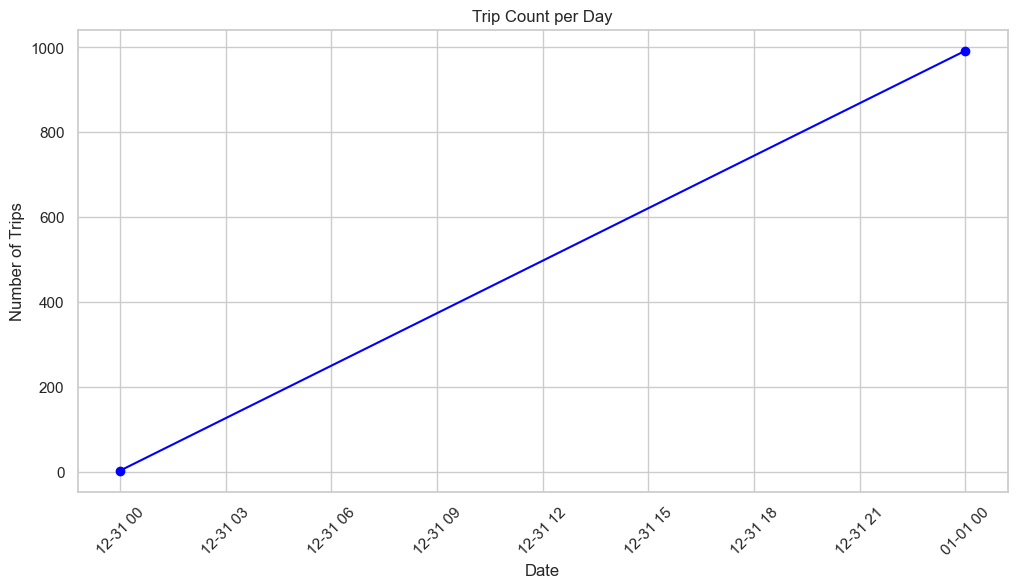

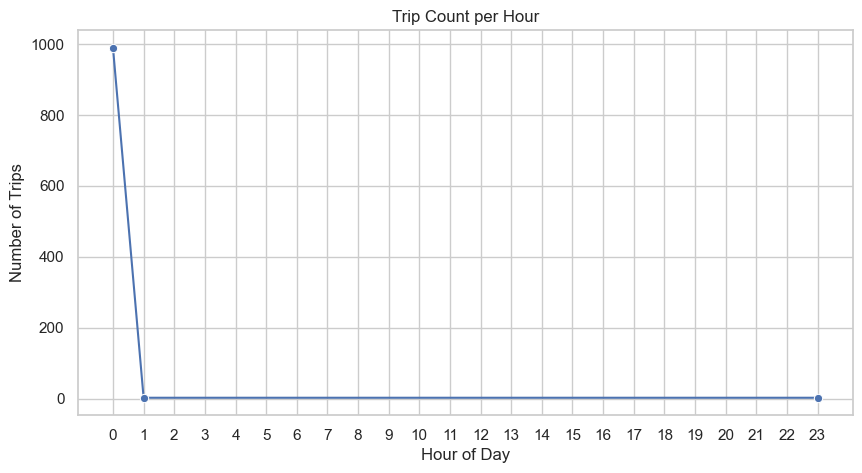

In [31]:
datetime_col = "tpep_pickup_datetime" if "tpep_pickup_datetime" in df.columns else "pickup_datetime"
df[datetime_col] = pd.to_datetime(df[datetime_col])

# Trip count per day
daily_counts = df.groupby(df[datetime_col].dt.date).size()

plt.figure(figsize=(12,6))
daily_counts.plot(kind='line', marker='o', color='blue')
plt.title("Trip Count per Day")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()

# Trip count per hour
df['hour'] = df[datetime_col].dt.hour
hourly_counts = df.groupby('hour').size()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title("Trip Count per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.show()

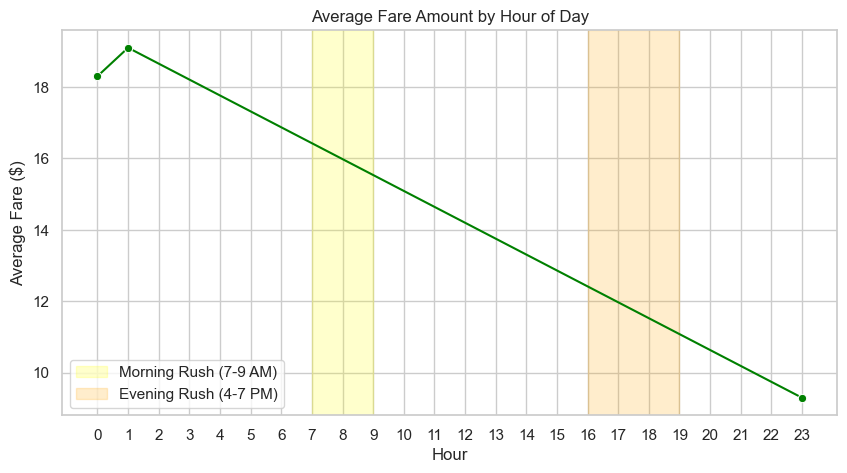

In [32]:
fare_by_hour = df.groupby('hour')['fare_amount'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=fare_by_hour.index, y=fare_by_hour.values, marker='o', color='green')
plt.title("Average Fare Amount by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Fare ($)")
plt.xticks(range(0, 24))
plt.axvspan(7, 9, color='yellow', alpha=0.2, label="Morning Rush (7-9 AM)")
plt.axvspan(16, 19, color='orange', alpha=0.2, label="Evening Rush (4-7 PM)")
plt.legend()
plt.show()

In [34]:
pip install folium


   ---------------------------------------- 2/2 [folium]

Note: you may need to restart the kernel to use updated packages.


In [37]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'hour'],
      dtype='object')


Top 10 Pickup Zones:
 PULocationID
79     58
142    55
239    44
237    44
249    39
263    36
234    35
229    34
236    32
148    31
Name: count, dtype: int64

Top 10 Dropoff Zones:
 DOLocationID
170    41
79     39
239    37
263    36
141    35
238    34
229    33
237    32
68     27
236    27
Name: count, dtype: int64


C:\Users\sahil\AppData\Local\Temp\ipykernel_4856\2496126809.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pickup_zone_counts.index, y=pickup_zone_counts.values, palette='Blues')


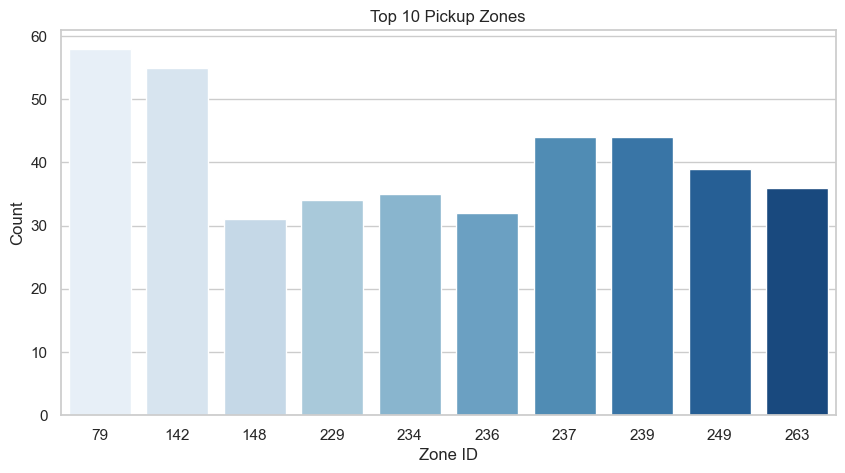

In [36]:
pickup_zone_counts = df['PULocationID'].value_counts().head(10)
dropoff_zone_counts = df['DOLocationID'].value_counts().head(10)

print("\nTop 10 Pickup Zones:\n", pickup_zone_counts)
print("\nTop 10 Dropoff Zones:\n", dropoff_zone_counts)

plt.figure(figsize=(10,5))
sns.barplot(x=pickup_zone_counts.index, y=pickup_zone_counts.values, palette='Blues')
plt.title("Top 10 Pickup Zones")
plt.xlabel("Zone ID")
plt.ylabel("Count")
plt.show()
